# Test PrimalDualBwK

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]E:\工作事务\个人工作\学术研究\Online-Learning-Implementation\Badanidiyuru-et-al-2013-Bandits_with_Knapsacks\Source\agent.py:79: RuntimeWarning: divide by zero encountered in true_divide
  x = np.argmax(ucb / EstCost) + 1
100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:48<00:00, 20.51it/s]


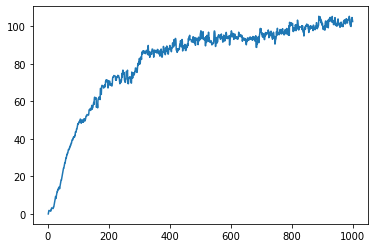

In [1]:
# conduct the experiment once
from Source.env import Env_FixedConsumption
from Source.agent import PrimalDualBwK
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

random_seed = 12345
np.random.seed(random_seed)

d = 3
m = 3
B = 1000
r_list = np.random.uniform(low=0.0, high=1.0, size=m)
d_list = np.random.uniform(low=0.0, high=1.0, size=(d + 1, m))
# d_list = np.eye(d)
# res = linprog(c=-r_list, A_ub=d_list, b_ub=1 * np.ones(d))
d_list[-1, :] = np.ones(m)
d += 1

# calculate the OPT_LP
res = linprog(c=-r_list, A_ub=d_list, b_ub=1 * np.ones(d))
reward_OPT_LP = np.cumsum(np.ones(B) * (-res.fun))

reward_ = list()
for T in tqdm(range(1, B + 1)):
    env = Env_FixedConsumption(r_list=r_list, d_list=d_list, m=m, B=T, d=d, random_seed=random_seed)
    agent = PrimalDualBwK(d=d, m=m, B=T, Crad=np.log(d * T * m))
    reward_T = list()
    while not env.if_stop():
        arm = agent.action()
        consumption, reward = env.response(arm=arm)
        agent.observe(reward=reward, consumption=consumption)
        reward_T.append(reward)
    reward_.append(np.sum(reward_T))
reward_ = np.array(reward_)

plt.plot(np.arange(1, B + 1), reward_OPT_LP[:B] - reward_[:B], label="regret")
plt.show()

In [2]:
action_history = np.array(agent.action_)
for arm_index in range(1, m+1):
    pulling_times = np.sum(action_history==arm_index)
    pulling_fraction = pulling_times / len(action_history)
    print(f"{arm_index}, pulling times {pulling_times}, pulling fraction {pulling_fraction}, opt pulling times {res.x[arm_index-1]*B}, opt pulling fraction {res.x[arm_index-1]}")

1, pulling times 862, pulling fraction 0.862, opt pulling times 1000.000000000602, opt pulling fraction 1.000000000000602
2, pulling times 80, pulling fraction 0.08, opt pulling times 3.879270423744442e-10, opt pulling fraction 3.879270423744442e-13
3, pulling times 58, pulling fraction 0.058, opt pulling times 2.95216445894205e-12, opt pulling fraction 2.95216445894205e-15
